# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [40]:
import pandas as pd
df = pd.read_csv("./data/movies.csv")

In [41]:
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [42]:
df.shape

(9999, 9)

In [43]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [44]:
data = df.copy(deep=True)
median = data.RATING.median()
data.fillna({'YEAR': 'Unknown'}, inplace=True)
data.fillna({'GENRE': 'Unknown'}, inplace=True)
data.fillna({'RATING': median}, inplace=True)
data.fillna({'VOTES': 0}, inplace=True)
data.isna().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

**1.4 Drop the duplicated rows**

In [45]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

**1.5 Replace the columns names to make them all lowercase**

In [46]:
data.columns = data.columns.str.lower()

In [47]:
data

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,0,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,0,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,NaN


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [48]:
data['votes'] = data['votes'].str.replace(',', '')
data['votes'] = data['votes'].astype(float)

In [49]:
data

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",7.1,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",7.1,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",7.1,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",7.1,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [57]:
average_rating = data.rating.mean()

print(f"The average rating is: {average_rating}")

The average rating is: 6.94608068561873


**2.2 What is the maximum runtime?**

In [56]:
max_runtime = data.runtime.max()

print(f"The maximum runtime is: {max_runtime}")

The maximum runtime is: 853.0


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [58]:
longest_runtime_movie = data[data['runtime'] == max_runtime]

print("Movie/Series with the longest runtime:")
display(longest_runtime_movie)

Movie/Series with the longest runtime:


,movies,year,genre,rating,one-line,stars,votes,runtime,gross
1902,El tiempo entre costuras,(2013–2014),"\nAdventure, Drama, History",8.3,\nSira Quiroga is a young Spanish dressmaker e...,"\n \n Stars:\nAdriana Ugarte, \n...",3876.0,853.0,NaN


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

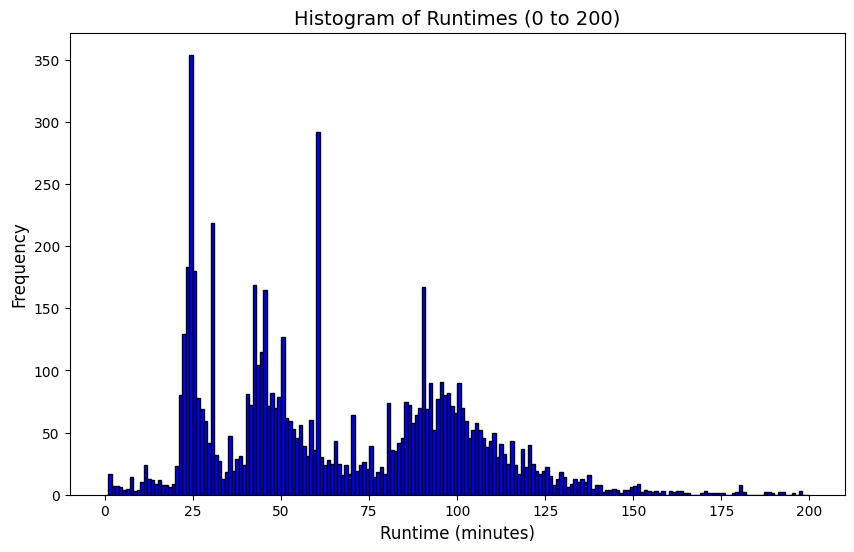

In [59]:
import matplotlib.pyplot as plt

filtered_data = data[(data['runtime'] > 0) & (data['runtime'] <= 200)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['runtime'], bins=200, range=(0, 200), color='blue', edgecolor='black')
plt.title('Histogram of Runtimes (0 to 200)', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [60]:
votes_90th_quantile = data['votes'].quantile(0.90)

print(f"A movie needs at least {votes_90th_quantile:.0f} votes to be in the top 10% most voted films.")

A movie needs at least 22193 votes to be in the top 10% most voted films.


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [101]:
df_meta = pd.read_csv('./data/movies_metadata.csv', low_memory=False)

In [102]:
# Checking for the right key to join on --> Movies and original_title
print("Columns in df:")
print(df.columns)
print("\nColumns in df_meta:")
print(df_meta.columns)

Columns in df:
Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross', 'MOVIES_clean', 'MOVIES_main'],
      dtype='object')

Columns in df_meta:
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [106]:
# Doing my best to normalize titles

import unicodedata
import string

def normalize_title(title):
    if isinstance(title, str):
        # Convert to lowercase
        title = title.lower()
        # Remove accents
        title = ''.join(c for c in unicodedata.normalize('NFD', title)
                        if unicodedata.category(c) != 'Mn')
        # Remove punctuation
        title = title.translate(str.maketrans('', '', string.punctuation))
        # Remove spaces
        title = title.replace(' ', '')
        # Strip leading/trailing whitespaces
        title = title.strip()
        return title
    else:
        return title


df['MOVIES_clean'] = df['MOVIES'].apply(normalize_title)
df_meta['original_title_clean'] = df_meta['original_title'].apply(normalize_title)

def extract_main_title(title):
    if isinstance(title, str):
        # Split the title at ':', '-', or '—' and take the first part
        for separator in [':', '-', '—']:
            if separator in title:
                title = title.split(separator)[0]
        return title.strip()
    else:
        return title

df['MOVIES_main'] = df['MOVIES'].apply(extract_main_title)
df_meta['original_title_main'] = df_meta['original_title'].apply(extract_main_title)

df['MOVIES_clean'] = df['MOVIES_main'].apply(normalize_title)
df_meta['original_title_clean'] = df_meta['original_title_main'].apply(normalize_title)

In [107]:
merge_df = pd.merge(df, df_meta, left_on='MOVIES_clean', right_on='original_title_clean', how='inner')
merge_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,MOVIES_clean,MOVIES_main,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,original_title_clean,original_title_main
0,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,mastersoftheuniverse,Masters of the Universe,False,NaN,22000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",NaN,11649,tt0093507,en,Masters of the Universe,The world of Eternia in the aftermath of Skele...,7.106954,/jzU5dXnx4tVRIA9DJjR4b7LFsel.jpg,"[{'name': 'Cannon Group', 'id': 1444}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-08-07,17336370.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A battle fought in the stars. Now... comes to ...,Masters of the Universe,False,5.1,196.0,mastersoftheuniverse,Masters of the Universe
1,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,thewalkingdead,The Walking Dead,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,95963,tt0114888,en,The Walking Dead,Five young marines on a suicide mission in Vie...,0.620873,/lP0YJPbtshhFHGVSgiQojuiC1im.jpg,"[{'name': 'Savoy Pictures', 'id': 11308}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-24,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Surviving the streets was just a rehearsal.,The Walking Dead,False,6.6,4.0,thewalkingdead,The Walking Dead
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,thewalkingdead,The Walking Dead,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,27115,tt0028478,en,The Walking Dead,A gang of racketeers frames down-on-his-luck J...,1.057723,/iqPdo0MyVItCmBc5pH5dAn1LCYp.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1936-03-14,0.0,66.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HE DIED a man with a hunger to love... and ret...,The Walking Dead,False,6.6,14.0,thewalkingdead,The Walking Dead
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,rickandmorty,Rick and Morty,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,412103,tt5950978,en,Rick and Morty: State of Georgia Vs. Denver Fe...,"A faithful, word-for-word recreation of one co...",0.760622,/8P6xZFSvSK2fxrVnhFdPYaNdihg.jpg,"[{'name': 'Williams Street', 'id': 6760}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-07-24,0.0,10.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Rick and Morty: State of Georgia Vs. Denver Fe...,False,8.7,10.0,rickandmorty,Rick and Morty
4,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...","264,222",42.0,NaN,lucifer,Lucifer,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.luciferthefilm.com/,299001,tt4131206,es,Lucifer,"On his downfall from Heaven to Hell, Lucifer p...",0.440012,/lRvYnqwrhlzClxwOZLTPGjxN7zP.jpg,"[{'name': 'Minds Meet', 'id': 12583}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",2014-10-22,0.0,108.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Lucifer,False,5.8,4.0,lucifer,Lucifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,\